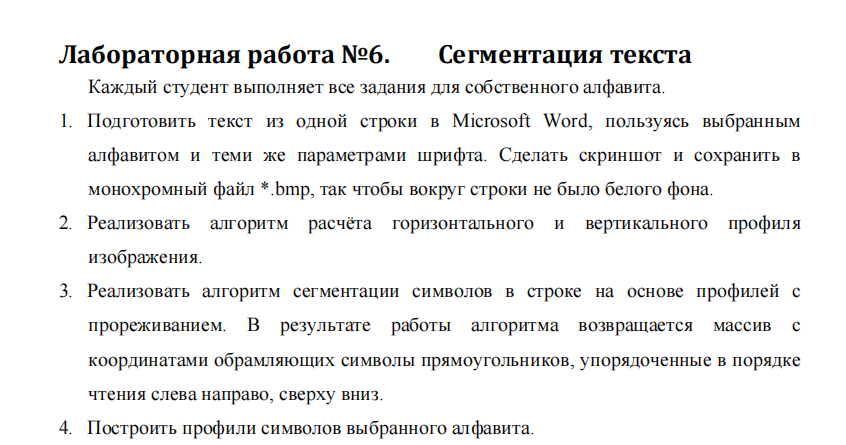

Вариант 21

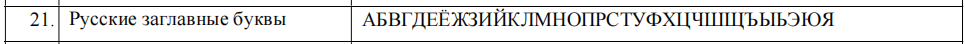

In [1]:
from PIL import Image, ImageFont, ImageDraw, ImageOps
import numpy as np
from matplotlib import pyplot as plt
import csv

In [2]:
string = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'.upper()
alphabet = []
for letter in string:
    alphabet.append(letter)

In [3]:
print(alphabet)

['А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З', 'И', 'Й', 'К', 'Л', 'М', 'Н', 'О', 'П', 'Р', 'С', 'Т', 'У', 'Ф', 'Х', 'Ц', 'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я']


In [4]:
def simple_binarization(image, threshold):
    img_arr = np.array(image)
    new_image = np.zeros(shape=img_arr.shape)
    new_image[img_arr > threshold] = 255
    return Image.fromarray(new_image.astype(np.uint8), 'L')

In [5]:
def cut_white_image_parts(image):

    for x in range(image.width-1, -1, -1):
        is_col_empty = True
        for y in range(image.height):
            if image.getpixel((x, y)) < 255:
                is_col_empty = False
                break

        if not is_col_empty:
            right_pixel = x
            break
            
    for y in range(image.height-1, -1, -1):
        is_row_empty = True
        for x in range(image.width):
            if image.getpixel((x, y)) < 255:
                is_row_empty = False
                break

        if not is_row_empty:
            bottom_pixel = y
            break
            

    return image.crop(box=(1, 0, right_pixel, bottom_pixel))

In [6]:
def color_used_arr(img):
    return np.asarray(np.asarray(img) < 1, dtype = np.int0)

In [7]:
def get_profiles(img):
    img_arr_for_calculations = color_used_arr(img)
    
    x_profiles = np.sum(img_arr_for_calculations, axis=0)
    x_range = np.arange(1, img_arr_for_calculations.shape[1] + 1)
    
    y_profiles = np.sum(img_arr_for_calculations, axis=1)
    y_range = np.arange(1, img_arr_for_calculations.shape[0] + 1)
    
    return {
        'x_profiles': x_profiles,
        'x_range': x_range,
        'y_profiles': y_profiles,
        'y_range': y_range
    }

In [8]:
def show_profiles_x(img):
    profiles = get_profiles(img)
    plt.figure(figsize=(12,2))
    plt.bar(x=profiles['x_range'], height=profiles['x_profiles'], width=0.85)
    plt.ylim(0, max(profiles['x_profiles']))
    plt.xlim(0, max(profiles['x_range']))
    plt.show()

In [9]:
def show_profiles_y(img):
    profiles = get_profiles(img)
    plt.figure(figsize=(12,2))
    plt.barh(y=profiles['y_range'], width=profiles['y_profiles'], height=0.85)
    plt.ylim(max(profiles['y_range']), 0 ) #img.size[1], 0)
    plt.xlim(0, max(profiles['y_profiles']))
    plt.show()

In [10]:
def get_segments_list(img):
    img_arr_for_calculations = color_used_arr(img)
    x_profiles = np.sum(img_arr_for_calculations, axis=0)
    lst = []
    new_lst = []
    for i in range(len(x_profiles)):
        if x_profiles[i] == 0:
            lst.append(i)
    lst.append(img.width)

    
    for i in range(len(lst)-1):
        if lst[i] + 1 != lst[i+1]:
            new_lst.append(lst[i])
            new_lst.append(lst[i+1])
    new_lst.append(img.width-1)
    new_lst = sorted(list(set(new_lst)))
    
    
    segments = []
    for i in range(0, len(new_lst)-1, 2):
        segments.append((new_lst[i], new_lst[i+1]))
    return segments

In [11]:
def result_draw(image, segments):
    left_color = (124,252,0)
    right_color = (160,32,240)
    result = image.copy().convert('RGB')
    result_draw = ImageDraw.Draw(im=result)
    for segment in segments:
        result_draw.rectangle(xy=[(segment[0], 0), (segment[0], result.height)], fill=left_color)
        result_draw.rectangle(xy=[(segment[1], 0), (segment[1], result.height)], fill=right_color)
    return result

In [12]:
font_size = 52
font = ImageFont.truetype("fonts/tnr_regular.ttf", font_size)

In [13]:
def generate_sentence():
    img = Image.new(mode="L", size=(2555, 150), color="white")
    draw = ImageDraw.Draw(img, mode = 'L')
    draw.text(xy=(0, 0), text='ОБРАБОТКА АУДИОВИЗУАЛЬНОЙ ИНФОРМАЦИИ', fill=0, font=font, anchor = 'lt')
    cutted_img = cut_white_image_parts(img)
    simple_binarization(cutted_img, 100).save('font_52_test.png')

In [14]:
generate_sentence()

In [15]:
font_52_test_img = Image.open('font_52_test.png')

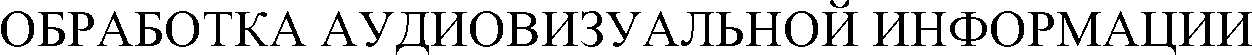

In [16]:
font_52_test_img

In [17]:
segments = get_segments_list(font_52_test_img)

In [18]:
segments

[(0, 34),
 (37, 65),
 (67, 94),
 (96, 133),
 (134, 162),
 (165, 199),
 (203, 232),
 (234, 268),
 (269, 306),
 (320, 357),
 (358, 394),
 (395, 429),
 (430, 467),
 (469, 503),
 (506, 538),
 (541, 578),
 (580, 603),
 (605, 641),
 (642, 679),
 (680, 714),
 (715, 743),
 (745, 781),
 (784, 818),
 (821, 858),
 (872, 909),
 (910, 946),
 (949, 987),
 (990, 1024),
 (1027, 1054),
 (1056, 1101),
 (1102, 1139),
 (1140, 1177),
 (1178, 1215),
 (1216, 1251)]

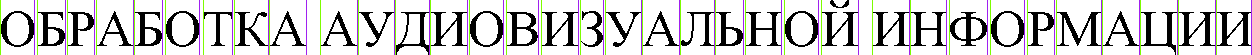

In [19]:
result = result_draw(font_52_test_img, segments)
result.save('result_font_52.png')
result

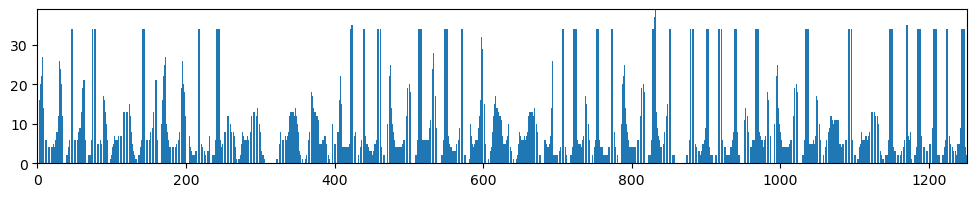

In [20]:
show_profiles_x(font_52_test_img)

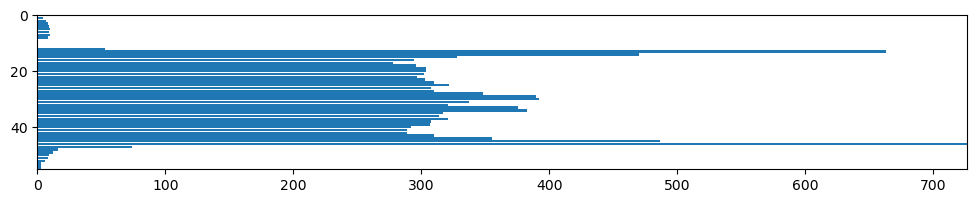

In [21]:
show_profiles_y(font_52_test_img)

In [22]:
font_size = 100
font = ImageFont.truetype("fonts/tnr_regular.ttf", font_size)

In [23]:
img = Image.new(mode="L", size=(3000, 120), color="white")
draw = ImageDraw.Draw(img, mode = 'L')
draw.text(xy=(0, 0), text='ОБРАБОТКА АУДИОВИЗУАЛЬНОЙ ИНФОРМАЦИИ', fill=0, font=font, anchor = 'lt')
cutted_img = cut_white_image_parts(img)
simple_binarization(cutted_img, 100).save('font_100_test.png')

In [24]:
font_100_test_img = Image.open('font_100_test.png')

In [25]:
segments_100_font = get_segments_list(font_100_test_img)

In [26]:
segments_100_font

[(2, 67),
 (72, 125),
 (129, 180),
 (184, 255),
 (257, 310),
 (316, 381),
 (387, 443),
 (447, 512),
 (513, 584),
 (610, 681),
 (682, 751),
 (752, 818),
 (821, 890),
 (895, 960),
 (965, 1025),
 (1032, 1101),
 (1104, 1149),
 (1153, 1222),
 (1224, 1295),
 (1296, 1362),
 (1365, 1418),
 (1422, 1491),
 (1496, 1561),
 (1566, 1635),
 (1663, 1732),
 (1735, 1804),
 (1809, 1881),
 (1888, 1953),
 (1958, 2009),
 (2014, 2100),
 (2102, 2173),
 (2175, 2244),
 (2247, 2316),
 (2319, 2387)]

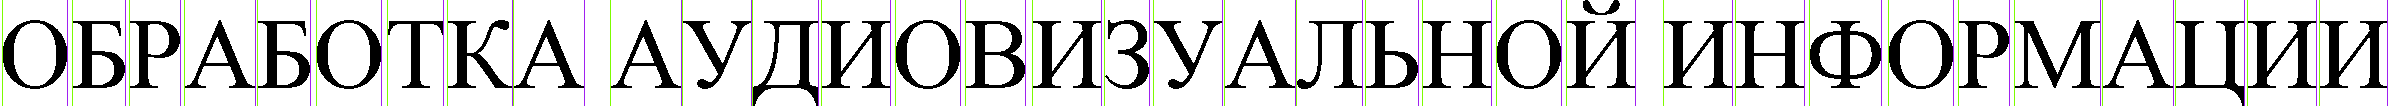

In [27]:
result_font_100 = result_draw(font_100_test_img, segments_100_font)
result_font_100.save('result_font_100.png')
result_font_100

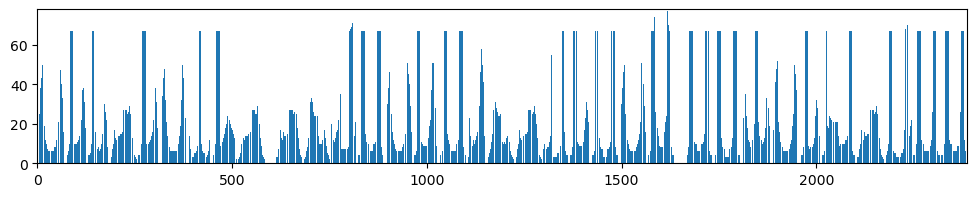

In [28]:
show_profiles_x(font_100_test_img)

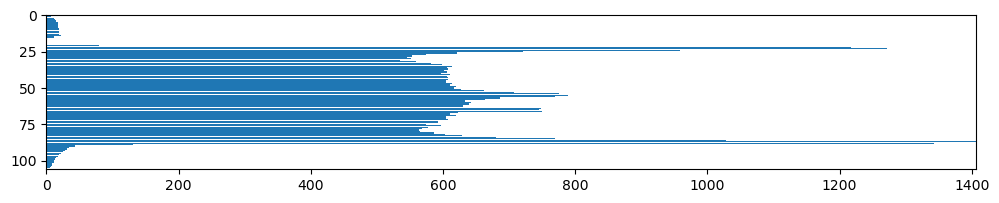

In [29]:
show_profiles_y(font_100_test_img)